## House price prediction project

#### Kaggle competition: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/code?competitionId=5407&sortBy=voteCount

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder
from scipy.special import boxcox1p
from sklearn.metrics import make_scorer, mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, LassoCV,LassoLarsCV, ElasticNet
warnings.filterwarnings('ignore')
%matplotlib inline

### Load data 

In [2]:
df = pd.read_csv('data/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
#check columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
test = pd.read_csv('data/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
test.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

* **Drop ID column since it does not have any additional value to the regression** 

In [7]:
df = df.drop(['Id'],1)
test = test.drop(['Id'],1)

### EDA

* **Analysing 'SalePrice'**

In [8]:
df['SalePrice'].describe() #statistical summary about SalesPrice

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

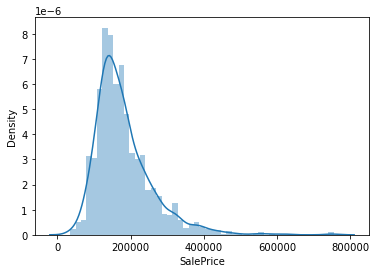

In [9]:
# let's check the distribution of the data
sns.distplot(df['SalePrice']);

In [10]:
#let's see skewness and kurtosis
print('Skewness: ' + str(df['SalePrice'].skew()))
print('Kurtosis: ' + str(df['SalePrice'].kurt()))

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


So, 'SalePrice' is **not normal distribution** - it represents **'peakedness'** and **positive skewness** and doesn't follow the diagonal line. In order to overcome the problem we try to **apply log transformation** on the data (usually log transformation works well in case of positive skewness). 

* **Correlation matrix**

<AxesSubplot:>

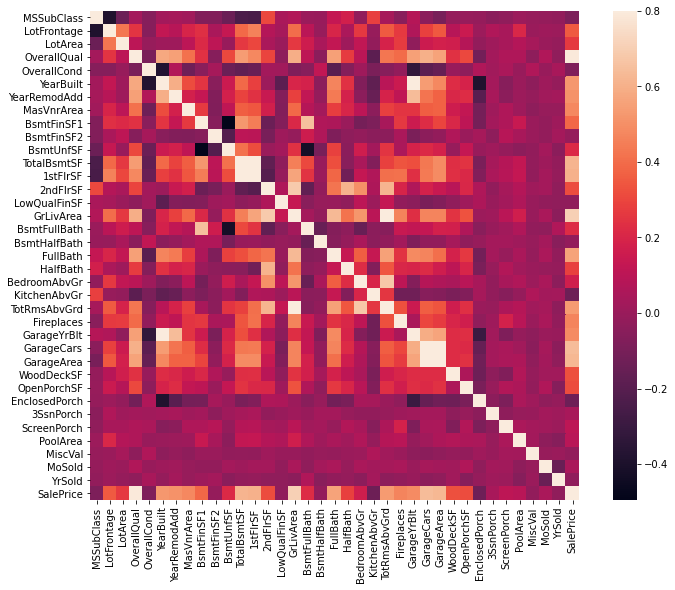

In [11]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In order to take a closer look, I will display a 'SalePrice' zoomed heatmap.

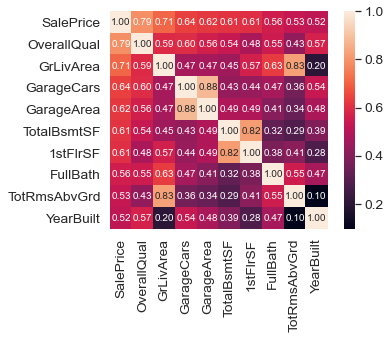

In [12]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Conclusions: 
* We can identify that 'TotalBsmtSF' and '1stFlrSF' are highly correlated, also 'Garage...' variables are significantly correlated with each other (both cases are multicollinearity).
* 'SalePrice' also has a couple of correlations with 'GrLivArea', 'TotalBsmtSF' and 'OverallQual' 

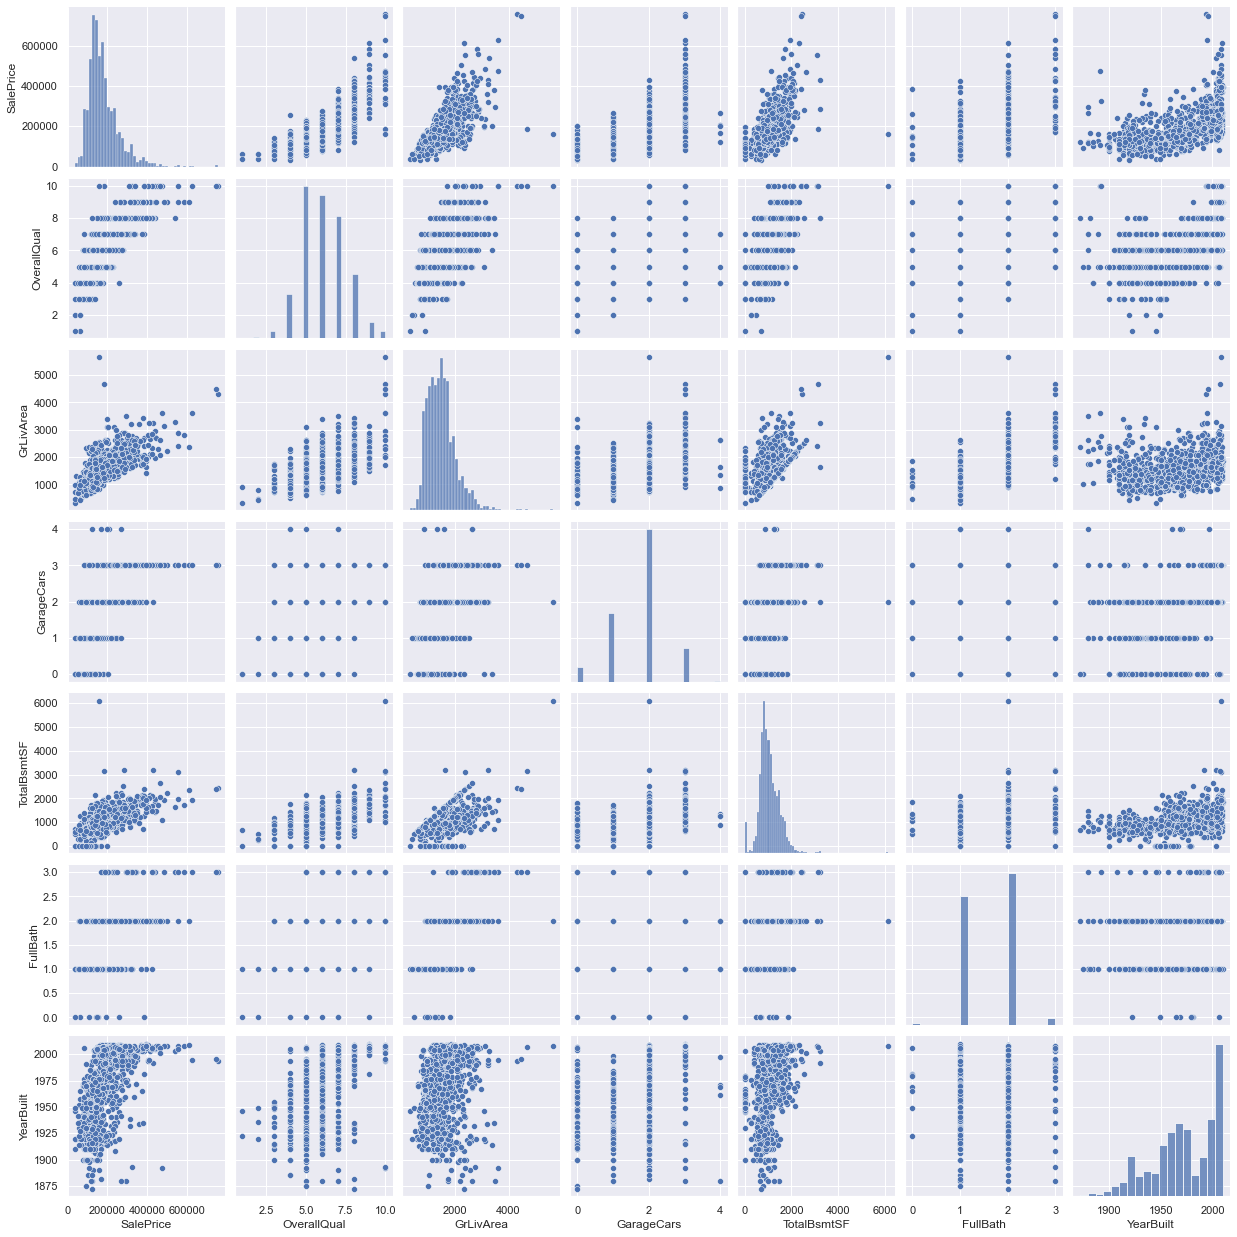

In [13]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show()

(-0.5, 9.5, 0.0, 800000.0)

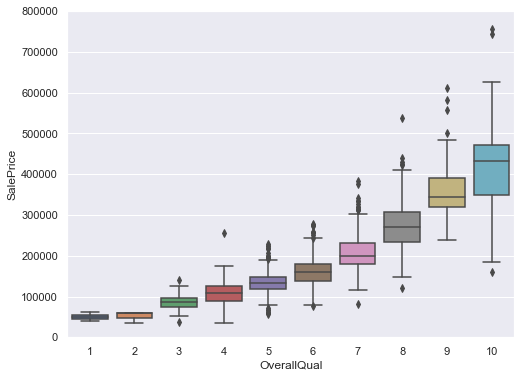

In [14]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

#### Interesting figures:

* 'TotalBsmtSF' and 'GrLiveArea' - in this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line
* 'SalePrice' and 'YearBuilt' - we can see a shy exponetial tendency in the upper limit of the 'dots cloud'. Also, notice how the set of dots regarding the last years tend to stay above this limit (prices are increasing faster nowdays)
* 'GrLivArea' and 'SalePrice' - we can identify a linear relationship between these two variables
* 'TotalBsmtSF' and 'SalePrice' - in this case the realtionship  between the variabées is more exponential

* **Checking missing data**

In [15]:
# display the top20 columns where missing values are occur
total_missing = df.isnull().sum().sort_values(ascending=False)
ratio = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, ratio], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


Those variables where the missing data is more than 15% will be removed (we will not try any tricks to refill the missing points). As a result, _'LotFrontage', 'Fence', 'Alley', 'MiscFeature', 'PoolQC'_ will be removed.

In regard of the 'Garage...' and 'Bsmt....' variables (missing ratio exactly the same for both, so propbably it refers to the same property), if we are thinkning back we analyzed that 'GarageCars' or 'GarageArea' and 'TotalBsmt' expresses the most important information about garage, therefore I will drop these columns related to garage.

Regarding 'MasVnrArea' and 'MasVnrType', these variables have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.

Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.

In [16]:
df = df.drop((missing_data[missing_data['Total'] > 1]).index,1)
df = df.drop(df.loc[df['Electrical'].isnull()].index)
missing_values = df.isnull().sum().max() 
print('Just to double check, we have ' + str(missing_values) + ' missing values!')

Just to double check, we have 0 missing values!


* **Checking outliers**

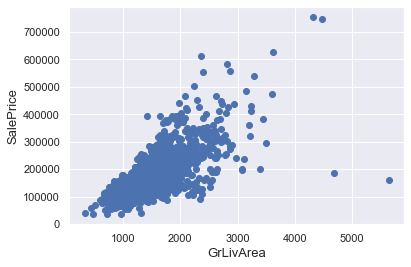

In [17]:
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

We can easily identify two outliers at the bottom right with low price. Therefore, I will delete those.

In [18]:
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index) #dropping those data points

### Feature Engineering

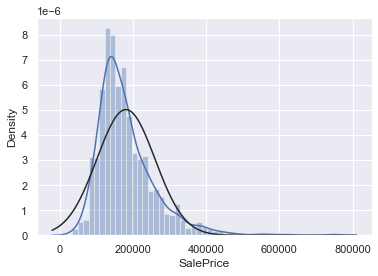

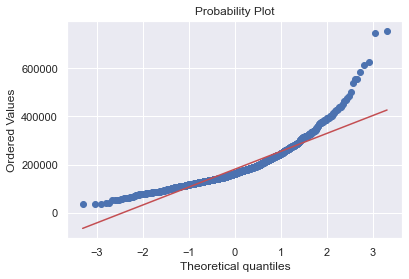

In [19]:
sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

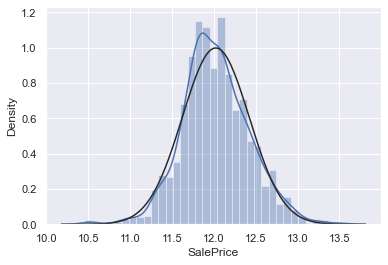

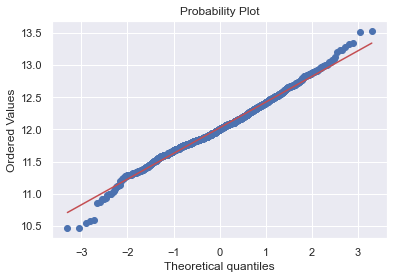

In [20]:
#applying log transformation
df['SalePrice'] = np.log(df['SalePrice'])
#display the transformed SalePrices
sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

* **'GrLivArea'** also has some positive skewness in the distribution

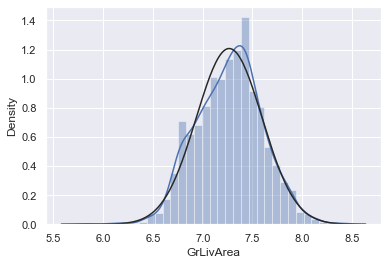

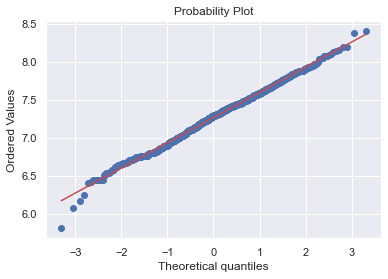

In [21]:
#handle skewness
df['GrLivArea'] = np.log(df['GrLivArea'])
#display the result of the transformation
sns.distplot(df['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['GrLivArea'], plot=plt)

* We also have to check **'TotalBsmtSF'**

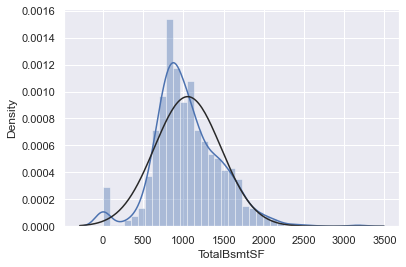

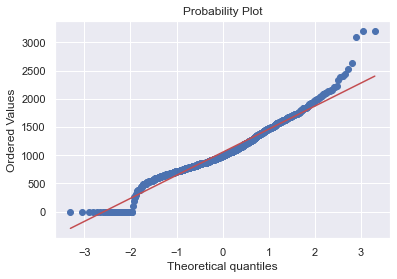

In [22]:
sns.distplot(df['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['TotalBsmtSF'], plot=plt)

The problem is in this case that we have **zero values that does not allow us to do log transformation**.
In order to handle this problem, I will create a binary variable which will indicate that haveing or not having basement. Then, I will use this variable to do log transformation on only non-zero observations, as a result ignoring all zero value data. With this solution, we do not losing the efefct of zero basement.

In [23]:
#implementing the above mentioned solution
df['HasBsmt_binary'] = pd.Series(len(df['TotalBsmtSF']), index=df.index)
df['HasBsmt_binary'] = 0 
df.loc[df['TotalBsmtSF']>0,'HasBsmt_binary'] = 1
#apply transformation
df.loc[df['HasBsmt_binary']==1,'TotalBsmtSF'] = np.log(df['TotalBsmtSF'])

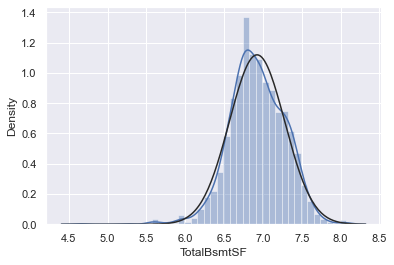

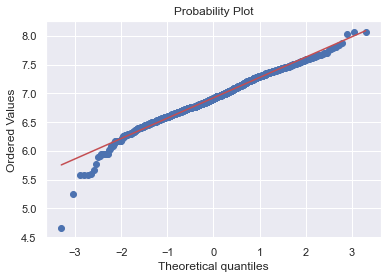

In [24]:
#display the result after transformation
sns.distplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [25]:
#drop the helper variable
df = df.drop(['HasBsmt_binary'],1)

* **Transforming some numerical variables that really categorical**

In [26]:
df['MSSubClass'] = df['MSSubClass'].apply(str)
df['OverallCond'] = df['OverallCond'].astype(str)
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

* **Adding an extra feature**

In [27]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

* **Label Encoding some categorical variables that may contain information in their ordering set**

In [28]:
cols = ('ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'Functional', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

* **Skewed features**

In [29]:
numeric_feats = df.dtypes[df.dtypes != "object"].index
# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.426546
PoolArea,15.927003
LotArea,12.556596
3SsnPorch,10.282886
LowQualFinSF,8.992490
LandSlope,4.803179
KitchenAbvGr,4.478508
BsmtFinSF2,4.245879
ScreenPorch,4.113045
BsmtHalfBath,4.094248


In [30]:
#handle those variables with Box-Cox transformation
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df[feat] = boxcox1p(df[feat], lam)

There are 45 skewed numerical features to Box Cox transform


* **Get dummy variables**

In [31]:
df =pd.get_dummies(df)
df.shape

(1457, 192)

### Preprocessing the test dataset

In [32]:
#delete variables that have been deleted from the train dataset
test = test.drop((missing_data[missing_data['Total'] > 1]).index,1)
test = test.drop(test.loc[test['Electrical'].isnull()].index)
missing_values = test.isnull().sum().max() 
print('Just to double check, we have ' + str(missing_values) + ' missing values!')

#cheking possble other missing values
total_missing_test = test.isnull().sum().sort_values(ascending=False)
ratio_test = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total_missing_test, ratio_test], axis=1, keys=['Total', 'Percent'])
missing_data_test.head(20)

Just to double check, we have 4 missing values!


,Total,Percent
MSZoning,4,0.002742
BsmtHalfBath,2,0.001371
BsmtFullBath,2,0.001371
Functional,2,0.001371
Utilities,2,0.001371
Exterior1st,1,0.000685
KitchenQual,1,0.000685
GarageCars,1,0.000685
GarageArea,1,0.000685
BsmtFinSF1,1,0.000685


In [33]:
#handle skewness
test['GrLivArea'] = np.log(test['GrLivArea'])

#implementing the above mentioned solution
test['HasBsmt_binary'] = pd.Series(len(test['TotalBsmtSF']), index=test.index)
test['HasBsmt_binary'] = 0 
test.loc[test['TotalBsmtSF']>0,'HasBsmt_binary'] = 1
#apply transformation
test.loc[test['HasBsmt_binary']==1,'TotalBsmtSF'] = np.log(test['TotalBsmtSF'])

#drop the helper variable
test = test.drop(['HasBsmt_binary'],1)

#convert variables that are categorical
test['MSSubClass'] = test['MSSubClass'].apply(str)
test['OverallCond'] = test['OverallCond'].astype(str)
test['YrSold'] = test['YrSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

#add new variable
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

In [34]:
cols = ('ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'Functional', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(test[c].values)) 
    test[c] = lbl.transform(list(test[c].values))

In [35]:
numeric_feats = test.dtypes[test.dtypes != "object"].index
# Check the skew of all numerical features
skewed_feats = test[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
#handle those variables with Box-Cox transformation
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    test[feat] = boxcox1p(test[feat], lam)

There are 44 skewed numerical features to Box Cox transform


In [36]:
#get dummies
test = pd.get_dummies(test)
test.shape

(1459, 177)

In [37]:
df.shape

(1457, 192)

* Shape of the training data and the test data is differ!!!!!! **We have to handle it!**

In [38]:
missing_columns = set(sorted(list(df.columns))) - set(sorted(list(test.columns)))
len(missing_columns)

15

In [39]:
#add those features with value 0 in order to have the same shep as in training
test[list(missing_columns)] = 0

In [40]:
df.shape[1] == test.shape[1]

True

### Model training and evaluation

In [41]:
class ensemble(object):
    def __init__(self, n_folds, stacker, base_models):
        self.n_folds = n_folds
        self.stacker = stacker
        self.base_models = base_models
    def fit_predict(self,train,test,ytr):
        X = train.values
        y = ytr.values
        T = test.values
        folds = list(KFold(len(y), n_folds = self.n_folds, shuffle = True, random_state = 0))
        S_train = np.zeros((X.shape[0],len(self.base_models)))
        S_test = np.zeros((T.shape[0],len(self.base_models))) # X need to be T when do test prediction
        for i,reg in enumerate(base_models):
            print ("Fitting the base model...")
            S_test_i = np.zeros((T.shape[0],len(folds))) # X need to be T when do test prediction
            for j, (train_idx,test_idx) in enumerate(folds):
                X_train = X[train_idx]
                y_train = y[train_idx]
                X_holdout = X[test_idx]
                reg.fit(X_train,y_train)
                y_pred = reg.predict(X_holdout)[:]
                S_train[test_idx,i] = y_pred
                S_test_i[:,j] = reg.predict(T)[:]
            S_test[:,i] = S_test_i.mean(1)
        
        print ("Stacking base models...")
        param_grid = {
        'alpha': [1e-3,5e-3,1e-2,5e-2,1e-1,0.2,0.3,0.4,0.5,0.8,1e0,3,5,7,1e1,2e1,5e1],
        }
        grid = GridSearchCV(estimator=self.stacker, param_grid=param_grid, n_jobs=1, cv=5, scoring=RMSE)
        grid.fit(S_train, y)
        try:
            print('Param grid:')
            print(param_grid)
            print('Best Params:')
            print(grid.best_params_)
            print('Best CV Score:')
            print(-grid.best_score_)
            print('Best estimator:')
            print(grid.best_estimator_)
            print(message)
        except:
            pass

        y_pred = grid.predict(S_test)[:]
        return y_pred, -grid.best_score_

In [42]:
base_models = [
        RandomForestRegressor(
            n_jobs=1, random_state=0,
            n_estimators=500, max_features=18, max_depth=11
        ),
        ExtraTreesRegressor(
            n_jobs=1, random_state=0, 
            n_estimators=500, max_features=20
        ),
        GradientBoostingRegressor(
            random_state=0, 
            n_estimators=500, max_features=10, max_depth=6,
            learning_rate=0.05, subsample=0.8
        ),
        XGBRegressor(
            seed=0,
            n_estimators=500, max_depth=7,
            learning_rate=0.05, subsample=0.8, colsample_bytree=0.75
        ),
    ]

In [43]:
ensem = ensemble(
        n_folds=5,
        stacker=Ridge(),
        base_models=base_models
    )

In [44]:
#y_pred, score = ensem.fit_predict(X_train,X_test,y_train)